# 1. Environment set-up

## 1.1 Installing required libraries

In [1]:
# Installing pandas
!pip install pandas
!pip install ydata_profiling


In [2]:
# Importing required lilbraries
import sqlite3
import pandas as pd



import seaborn as sns
sns.set_theme(font_scale=1.5)

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

from google.colab import drive
from ydata_profiling import ProfileReport

## 1.2 Uploading the OList Store Database to Google drive and connecting Google Drive to Colab

Download the following [SQLite database](https://drive.google.com/file/d/1ax3vyKZuEV79_Ma4KILW0D1W7nJ8isvW/view?usp=sharing)
and upload it to your Google drive

In [7]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
ls

gdrive/  sample_data/


In [9]:
# Navigating to the Olist downloaded dataset (the denormalized file is also saved in the same folder afterwards)

In [10]:
ls 'gdrive/MyDrive/Colab Notebooks/Telerik'

denormalized_dataset_Olist_cleaned.csv  olist_order_stats.csv      online_transactions.sqlite
denormalized_dataset_Olist.csv          olist_order_stats_new.csv


# 2. Connect to database with Python & Read SQL files

In [11]:
# store the full path to the database in a simple string variable
db_path = '/content/gdrive/MyDrive/Colab Notebooks/Telerik/online_transactions.sqlite'

In [12]:
# use the connect() method from sqlite3
# the method returns a connection object that we store in the variable 'con'
con = sqlite3.connect(db_path)

We can now use the connection object `con`, which represents a live connection to the sqlite database.

`pandas`'s method `read_sql` supports the execution of a SQL statement directly on a live connection. We use it like this:

In [13]:
# Reading all the sql files from the dataset
df_order_payments_dataset = pd.read_sql(sql="SELECT * FROM olist_order_payments_dataset", con=con)
df_orders_dataset = pd.read_sql(sql="SELECT * FROM olist_orders_dataset", con=con)
df_customers_dataset = pd.read_sql(sql="SELECT * FROM olist_customers_dataset", con=con)
df_sellers_dataset = pd.read_sql(sql="SELECT * FROM olist_sellers_dataset", con=con)
df_order_items_dataset = pd.read_sql(sql="SELECT * FROM olist_order_items_dataset", con=con)
df_order_products_dataset = pd.read_sql(sql="SELECT * FROM olist_products_dataset", con=con)
df_geolocation_dataset = pd.read_sql(sql="SELECT * FROM olist_geolocation_dataset", con=con)
df_order_reviews_dataset = pd.read_sql(sql="SELECT * FROM olist_order_reviews_dataset", con=con)
df_closed_deals_dataset = pd.read_sql(sql="SELECT * FROM olist_closed_deals_dataset", con=con)
df_order_marketing_leads_dataset = pd.read_sql(sql="SELECT * FROM olist_marketing_qualified_leads_dataset", con=con)
df_category_names_dataset = pd.read_sql(sql="SELECT * FROM product_category_name_translation", con=con)

The first argument to the function, `sql`, is the sql statement we want to execute (passed as a string) and the second argument, `con` is the live connection to the database.
As usual read the online documentation of `read_sql` for more advanced usage.

`pandas` will automatically return a `DataFrame`, which we can manipulate in all the familiar ways we know.

# 3. Merging the files that we will need into one .csv file

## 3.1 Merging Order Items Dataset with Orders Dataset

In [14]:
df_order_order_items = pd.merge(left=df_orders_dataset, right=df_order_items_dataset, how='left',
                                left_on='order_id', right_on='order_id', indicator=True)

In [15]:
df_order_order_items.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,_merge
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,both
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,both
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,both
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,both
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,both


In [16]:
df_order_order_items['_merge'].value_counts()

_merge
both          112650
left_only        775
right_only         0
Name: count, dtype: int64

**There are 775 orders with no items**

In [17]:
m1 = df_order_order_items['_merge'] == 'left_only'
df_order_order_items[m1]['order_status'].value_counts()

order_status
unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: count, dtype: int64

**Exploring further those 775 orders, we find out that the majority are unavailable or cancelled, therefore we plan to exclude those**

In [18]:
m1 = df_order_order_items['_merge'] == 'both'

df_order_order_items = df_order_order_items[m1]

In [19]:
#get rid of indicator, not needed anymor
df_order_order_items = df_order_order_items.drop(columns='_merge')

## 3.2 Merging with Customers Dataset

In [20]:
df_add_customer_info = pd.merge(left=df_order_order_items, right=df_customers_dataset, how='left',
                                left_on='customer_id', right_on='customer_id', indicator=True)

df_add_customer_info.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,_merge
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,both
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,both
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,both
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,both
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,09195,santo andre,SP,both


In [21]:
df_add_customer_info['_merge'].value_counts()

_merge
both          112650
left_only          0
right_only         0
Name: count, dtype: int64

**No quality issues found here**

In [22]:
#get rid of indicator, not needed anymore
df_add_customer_info = df_add_customer_info.drop(columns='_merge')

## 3.3 Merging with Sellers Dataset

In [23]:
df_add_sellers_info = pd.merge(left=df_add_customer_info, right=df_sellers_dataset, how='left',
                               left_on='seller_id', right_on='seller_id', indicator=True)

In [24]:
df_add_sellers_info.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,_merge
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,9350,maua,SP,both
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP,both
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP,both
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,31842,belo horizonte,MG,both
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,09195,santo andre,SP,8752,mogi das cruzes,SP,both


In [25]:
df_add_sellers_info['_merge'].value_counts()

_merge
both          112650
left_only          0
right_only         0
Name: count, dtype: int64

**No quality issues found here**

In [26]:
#get rid of indicator, not needed anymore
df_add_sellers_info = df_add_sellers_info.drop(columns='_merge')

## 3.4 Merging with Products Dataset

In [27]:
df_add_products = pd.merge(left=df_add_sellers_info, right=df_order_products_dataset, how='left',
                           left_on='product_id', right_on='product_id', indicator=True)

In [28]:
df_add_products.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,_merge
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,both
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,both
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,both
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,MG,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,both
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,SP,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,both


In [29]:
m1 = df_add_products['product_category_name'].isna()
df_add_products[m1]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,_merge
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,None,None,2017-05-09 00:00:00,1.0,a1804276d9941ac0733cfd409f5206eb,...,SP,None,NaN,NaN,NaN,600.0,35.0,35.0,15.0,both
122,bfe42c22ecbf90bc9f35cf591270b6a7,803ac05904124294f8767894d6da532b,delivered,2018-01-27 22:04:34,2018-01-27 22:16:18,2018-02-03 03:56:00,2018-02-09 20:16:40,2018-02-26 00:00:00,1.0,71225f49be70df4297892f6a5fa62171,...,SP,None,NaN,NaN,NaN,200.0,16.0,2.0,11.0,both
212,58ac1947c1a9067b9f416cba6d844a3f,ee8e1d37f563ecc11cc4dcb4dfd794c2,delivered,2017-09-13 09:18:50,2017-09-13 13:45:43,2017-09-14 21:20:03,2017-09-21 21:16:17,2017-09-25 00:00:00,1.0,9820e04e332fc450d6fd975befc1bc28,...,SP,None,NaN,NaN,NaN,10800.0,40.0,40.0,30.0,both
264,e22b71f6e4a481445ec4527cb4c405f7,1faf89c8f142db3fca6cf314c51a37b6,delivered,2017-04-22 13:48:18,2017-04-22 14:01:13,2017-04-24 19:08:53,2017-05-02 15:45:27,2017-05-11 00:00:00,1.0,3bc5164bc7f4be77002d6651da65c98c,...,MG,None,NaN,NaN,NaN,550.0,16.0,11.0,19.0,both
303,a094215e786240fcfefb83d18036a1cd,86acfb656743da0c113d176832c9d535,delivered,2018-02-08 18:56:45,2018-02-08 19:32:18,2018-02-09 21:41:54,2018-02-19 13:28:50,2018-02-22 00:00:00,1.0,5a848e4ab52fd5445cdc07aab1c40e48,...,SP,None,NaN,NaN,NaN,400.0,20.0,12.0,15.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112228,1a10e938a1c7d8e5eecc3380f71ca76b,8a81607347c25d881d995d94de6ad824,delivered,2018-07-25 08:58:35,2018-07-26 03:10:20,2018-07-27 11:32:00,2018-08-01 19:28:20,2018-08-10 00:00:00,1.0,8d39a63db6a98e40571f486e0c711cf7,...,SP,None,NaN,NaN,NaN,450.0,16.0,7.0,11.0,both
112397,e33865519137f5737444109ae8438633,64b086bdcc54458af3ea3bd838db54a5,delivered,2018-05-28 00:44:06,2018-05-29 03:31:17,2018-05-30 13:13:00,2018-06-01 22:25:39,2018-06-20 00:00:00,1.0,e9cbc0910ab050cbd92fbeb051c270ea,...,SP,None,NaN,NaN,NaN,600.0,32.0,15.0,28.0,both
112404,f0dd9af88d8ef5a8e4670fbbedaf19c4,30ddb50bd22ee927ebe308ea3da60735,delivered,2017-09-02 20:38:29,2017-09-05 04:24:12,2017-09-14 23:13:41,2017-09-15 14:59:50,2017-09-19 00:00:00,1.0,0c877471e35049402bca235e06cb8063,...,SP,None,NaN,NaN,NaN,10750.0,34.0,20.0,30.0,both
112410,272874573723eec18f23c0471927d778,48e080c8001e92ebea2b64e474f91a60,delivered,2017-12-20 23:10:33,2017-12-20 23:29:37,2017-12-21 21:49:35,2017-12-26 22:29:32,2018-01-09 00:00:00,1.0,5a848e4ab52fd5445cdc07aab1c40e48,...,SP,None,NaN,NaN,NaN,400.0,20.0,12.0,15.0,both


In [30]:
df_add_products[m1]['product_id'].nunique()

610

There are 1603 orders with a total of 610 unique products that don't have category name. We will still use those as they have other features like price, review score, purchase/delivery dates (most of them).

In [31]:
df_add_products['_merge'].value_counts()

_merge
both          112650
left_only          0
right_only         0
Name: count, dtype: int64

In [32]:
#get rid of indicator, not needed anymore
df_add_products = df_add_products.drop(columns='_merge')

## 3.5 Merging with Products Translation

In [33]:
# merge with products translation to get english names
df_add_products = pd.merge(left=df_add_products, right=df_category_names_dataset, how='left',
                           left_on='product_category_name', right_on='product_category_name', indicator=True)

In [34]:
df_add_products.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,_merge
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,both
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,both
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,both
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,both
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,both


In [35]:
df_add_products['_merge'].value_counts()

_merge
both          111023
left_only       1627
right_only         0
Name: count, dtype: int64

1627 products without english names for their product categories. After subtracting the 1603 products without product category, we are left with 24 entries with Portugues langues only (1627 products w/o translation - 1603 that have no products = 24 remaining)

In [36]:
df_add_products[df_add_products['product_category_name_english'].isna()]['product_category_name'].value_counts()

product_category_name
portateis_cozinha_e_preparadores_de_alimentos    15
pc_gamer                                          9
Name: count, dtype: int64

In [37]:
#get rid of indicator, not needed anymore
df_add_products = df_add_products.drop(columns='_merge')

## 3.6 Merging with Payment Method

In [38]:
df_add_payments = pd.merge(left=df_add_products, right=df_order_payments_dataset, how='left',
                           left_on='order_id', right_on='order_id', indicator=True)
df_add_payments.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,_merge
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,housewares,1.0,credit_card,1.0,18.12,both
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,housewares,3.0,voucher,1.0,2.00,both
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,housewares,2.0,voucher,1.0,18.59,both
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,400.0,19.0,13.0,19.0,perfumery,1.0,boleto,1.0,141.46,both
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,420.0,24.0,19.0,21.0,auto,1.0,credit_card,3.0,179.12,both


In [39]:
df_add_payments['_merge'].value_counts()

_merge
both          117601
left_only          3
right_only         0
Name: count, dtype: int64

There are 3 order items with no payment info

In [40]:
df_add_payments[df_add_payments['payment_type'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,_merge
36410,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,1.0,5a6b04657a4c5ee34285d1e4619a96b4,...,1000.0,16.0,16.0,16.0,health_beauty,NaN,NaN,NaN,NaN,left_only
36411,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,2.0,5a6b04657a4c5ee34285d1e4619a96b4,...,1000.0,16.0,16.0,16.0,health_beauty,NaN,NaN,NaN,NaN,left_only
36412,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,3.0,5a6b04657a4c5ee34285d1e4619a96b4,...,1000.0,16.0,16.0,16.0,health_beauty,NaN,NaN,NaN,NaN,left_only


real order items related to 1 order delivered to the customer but without payment information. Excluding this, as it is probably due to data quality issues.

In [41]:
#removing those 3 order items
df_add_payments = df_add_payments[ ~df_add_payments['payment_type'].isna()]

In [42]:
#get rid of indicator, not needed anymore
df_add_payments = df_add_payments.drop(columns='_merge')

## 3.7 Merging with Reviews Dataset

In [43]:
df_order_reviews_dataset.shape

(99224, 7)

In [44]:
# removing duplicate orderIDs that contain more than 1 review. Leaving just the last review score based on timestamp.
## Our logic is that the customer might have updated the review after a while when he is more familiar with the product
### Therefore, last review score should be more relevant and represent the final score that the customer gives

df_order_reviews_cleaned = df_order_reviews_dataset.sort_values('review_answer_timestamp').drop_duplicates('order_id', keep='last')

In [45]:
df_order_reviews_cleaned.shape

(98673, 7)

In [46]:


df_add_reviews = pd.merge(left=df_add_payments, right=df_order_reviews_cleaned, how='left',
                          left_on='order_id', right_on='order_id', indicator=True)
df_add_reviews.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,_merge
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,both
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,both
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,both
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,both
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,None,None,2018-08-18 00:00:00,2018-08-22 19:07:58,both


In [47]:
df_add_reviews['_merge'].value_counts()

_merge
both          116623
left_only        978
right_only         0
Name: count, dtype: int64

978 order items belonging to 749 orders do not have reviews. Not neccessary due to data quality issue because it is possible that a customer did not leave a review as not all customers leave reviews. However, as our focus is understanding customer satisfaction which is based on review score, we will exclude those orderIDs

In [48]:
m1 = df_add_reviews['_merge'] == 'both'

df_add_reviews = df_add_reviews[m1]

In [49]:
df_add_reviews.shape

(116623, 41)

In [50]:
df_merged = df_add_reviews.copy()

In [51]:
df_merged.shape

(116623, 41)

In [52]:
# extracting the merged file into csv
#df_merged.to_csv("denormalized_dataset_Olist_cleaned.csv", sep=",")

# 4. Loading CSV file and preparing Stats

In [53]:
df_merged = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Telerik/denormalized_dataset_Olist_cleaned.csv", sep=',')

In [54]:
df_merged

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,_merge
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,both
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,both
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,both
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,...,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,both
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,...,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116618,117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,...,credit_card,3.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,both
116619,117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,...,credit_card,5.0,271.01,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,both
116620,117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,...,credit_card,4.0,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,both
116621,117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,...,credit_card,4.0,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,both


In [55]:
# transforming string columns to date-time


df_merged['order_delivered_customer_date'] = pd.to_datetime(df_merged['order_delivered_customer_date'])
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])
df_merged['order_estimated_delivery_date'] = pd.to_datetime(df_merged['order_estimated_delivery_date'])
df_merged['order_delivered_carrier_date'] = pd.to_datetime(df_merged['order_delivered_carrier_date'])
df_merged['shipping_limit_date'] = pd.to_datetime(df_merged['shipping_limit_date'])
df_merged['purchase_month'] = df_merged['order_purchase_timestamp'].dt.strftime('%B-%Y')

In [56]:
df_merged


,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,_merge,purchase_month
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,...,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,both,October-2017
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,...,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,both,October-2017
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,...,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,both,October-2017
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,...,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,both,July-2018
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,...,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,both,August-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116618,117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,...,3.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,both,February-2018
116619,117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,...,5.0,271.01,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,both,August-2017
116620,117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,...,4.0,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,both,January-2018
116621,117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,...,4.0,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,both,January-2018


In [57]:
def order_id_stats(x: pd.Series):
    """
    This function computes the total delivery time per order.
    Time is computed in both days and in seconds for higher resolution
    """
    delivery_to_purchase_days = (x['order_delivered_customer_date'] - x['order_purchase_timestamp']).dt.days.mean()
    delayed_delivery_days = (x['order_delivered_customer_date'] - x['order_estimated_delivery_date']).dt.days.mean()
    seller_delay_days = (x['order_delivered_carrier_date'] - x['shipping_limit_date']).dt.days.mean()
    review_score = x['review_score'].mean()
    product_description_lenght = x['product_description_lenght'].mean()
    product_photos_qty = x['product_photos_qty'].mean()
    freight_value = x['freight_value'].mean()
    price = x['price'].mean()
    product_weight_g = x['product_weight_g'].mean()


    return pd.DataFrame({
            'review_score': [review_score],
            'delivery_to_purchase_days': [delivery_to_purchase_days],
            'delayed_delivery_days': [delayed_delivery_days],
            'seller_delay_days': [seller_delay_days],
            'price': [price],
            'freight_value': [freight_value],
            'product_description_lenght': [product_description_lenght],
            'product_photos_qty': [product_photos_qty],
            'product_weight_g': [product_weight_g]})

# group by order and compute the delivery statistics
df_order_stats = df_merged.groupby('order_id').apply(order_id_stats)
df_order_stats.index = df_order_stats.index.droplevel(1)

In [58]:
# creating binary satisfied and on_time
# creating freight to price ratio
df_order_stats['satisfied'] = 0
df_order_stats.loc[df_order_stats['review_score'] >= 4, 'satisfied'] = 1
df_order_stats['on_time'] = 0
df_order_stats.loc[df_order_stats['delayed_delivery_days'] <= 0, 'on_time'] = 1
df_order_stats['Freight_to_Price'] = df_order_stats['freight_value'] / df_order_stats ['price']

In [59]:
df_order_stats

,review_score,delivery_to_purchase_days,delayed_delivery_days,seller_delay_days,price,freight_value,product_description_lenght,product_photos_qty,product_weight_g,satisfied,on_time,Freight_to_Price
order_id,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,5.0,7.0,-9.0,0.0,58.90,13.29,598.0,4.0,650.0,1,1,0.225637
00018f77f2f0320c557190d7a144bdd3,4.0,16.0,-3.0,1.0,239.90,19.93,239.0,2.0,30000.0,1,1,0.083076
000229ec398224ef6ca0657da4fc703e,5.0,7.0,-14.0,-3.0,199.00,17.87,695.0,2.0,3050.0,1,1,0.089799
00024acbcdf0a6daa1e931b038114c75,4.0,6.0,-6.0,-5.0,12.99,12.79,480.0,1.0,200.0,1,1,0.984604
00042b26cf59d7ce69dfabb4e55b4fd9,5.0,25.0,-16.0,2.0,199.90,18.14,409.0,1.0,3750.0,1,1,0.090745
...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,5.0,17.0,-8.0,-7.0,299.99,43.41,1002.0,3.0,10150.0,1,1,0.144705
fffcd46ef2263f404302a634eb57f7eb,5.0,9.0,-9.0,-3.0,350.00,36.53,232.0,1.0,8950.0,1,1,0.104371
fffce4705a9662cd70adb13d4a31832d,5.0,4.0,-13.0,-5.0,99.90,16.95,869.0,1.0,967.0,1,1,0.169670


In [60]:
df_avg = df_order_stats['delivery_to_purchase_days'].mean()
print(df_avg)

12.052322365880892


In [61]:
df_sum = df_order_stats['delivery_to_purchase_days'].sum()
print(df_sum)

1154962.0


In [62]:
df_rev = df_order_stats['review_score'].mean()
print(df_rev)

4.104691776624862


In [63]:
correlation = df_order_stats.corr()
correlation

,review_score,delivery_to_purchase_days,delayed_delivery_days,seller_delay_days,price,freight_value,product_description_lenght,product_photos_qty,product_weight_g,satisfied,on_time,Freight_to_Price
review_score,1.000000,-0.333865,-0.267029,-0.064518,-0.011958,-0.038084,0.011199,0.014813,-0.030511,0.900573,0.452882,-0.021334
delivery_to_purchase_days,-0.333865,1.000000,0.601622,0.161849,0.060158,0.216224,0.003731,-0.027243,0.080085,-0.292428,-0.601207,0.080953
delayed_delivery_days,-0.267029,0.601622,1.000000,0.269254,-0.008092,-0.044435,0.002322,0.003760,0.010466,-0.233590,-0.592410,-0.031322
seller_delay_days,-0.064518,0.161849,0.269254,1.000000,0.011339,0.008623,0.003995,0.016636,0.012886,-0.057075,-0.114130,-0.002657
price,-0.011958,0.060158,-0.008092,0.011339,1.000000,0.423878,0.202408,0.049623,0.344919,-0.004975,-0.031109,-0.311392
freight_value,-0.038084,0.216224,-0.044435,0.008623,0.423878,1.000000,0.097296,0.022940,0.618796,-0.032152,-0.050269,0.083545
product_description_lenght,0.011199,0.003731,0.002322,0.003995,0.202408,0.097296,1.000000,0.120019,0.058616,0.014011,-0.003139,-0.132438
product_photos_qty,0.014813,-0.027243,0.003760,0.016636,0.049623,0.022940,0.120019,1.000000,0.028878,0.013058,0.007847,-0.058585
product_weight_g,-0.030511,0.080085,0.010466,0.012886,0.344919,0.618796,0.058616,0.028878,1.000000,-0.026778,-0.027103,-0.111967
satisfied,0.900573,-0.292428,-0.233590,-0.057075,-0.004975,-0.032152,0.014011,0.013058,-0.026778,1.000000,0.396878,-0.021416


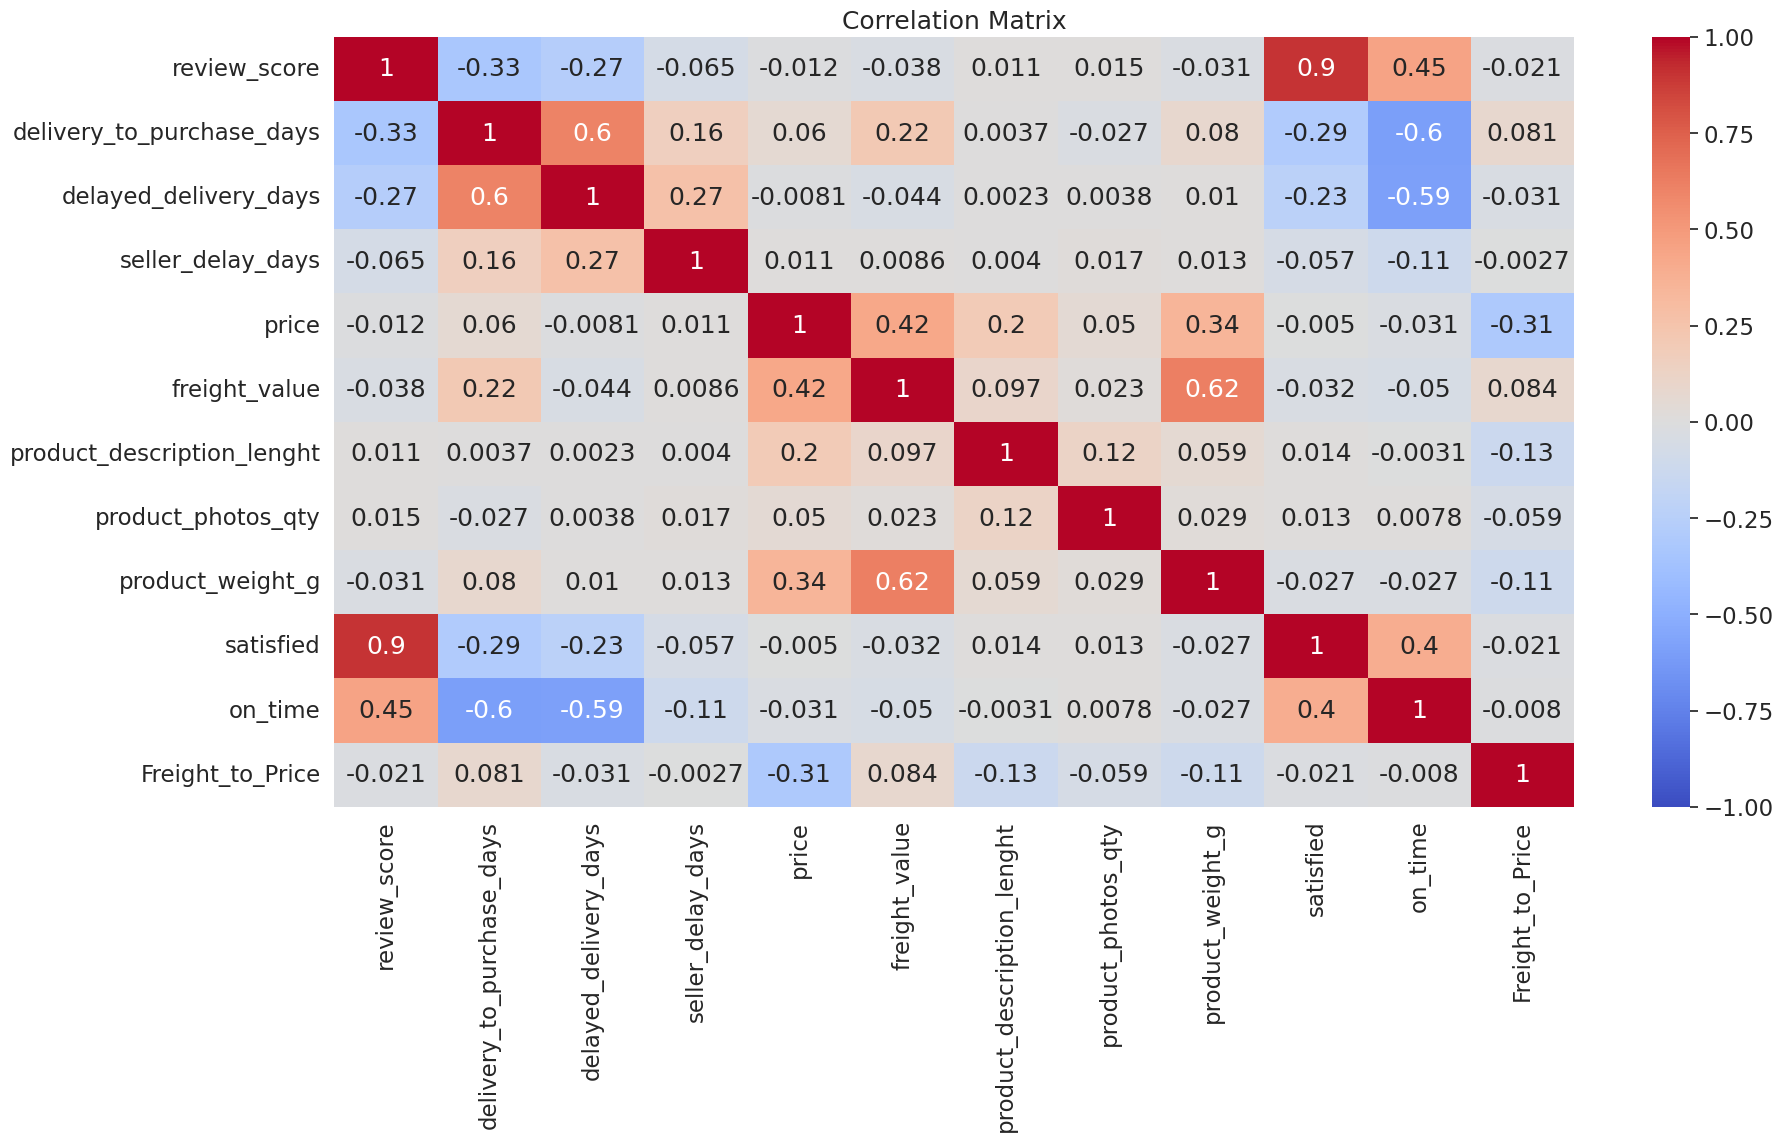

In [64]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.show()

# 5. Modeling Review Score vs Delivery Days

## 5.1 Review Score vs Delivery To Purchase Days - Linear Regression

In [ ]:

df_review_stats = df_order_stats.groupby('review_score')['delivery_to_purchase_days']\
                      .agg(['mean', 'median', 'min', 'max','count'])\
                      .reset_index()

Text(0.5, 0, 'Median days purchase to delivery')

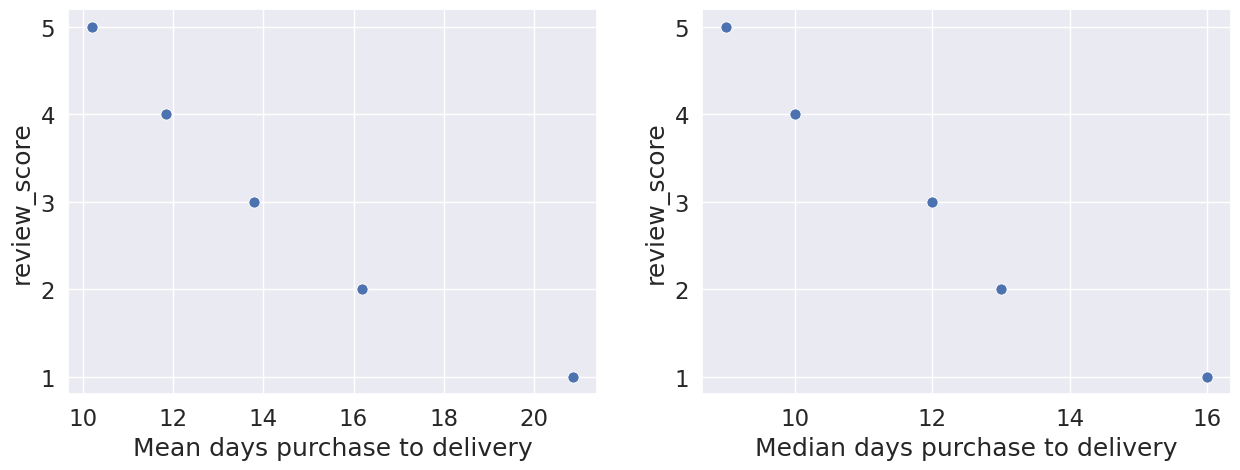

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


sns.scatterplot(data=df_review_stats, x='mean', y='review_score',
                ax=axes[0], s=65)
axes[0].set_xlabel("Mean days purchase to delivery")

sns.scatterplot(data=df_review_stats, x='median', y='review_score',
                ax=axes[1], s=65)
axes[1].set_xlabel("Median days purchase to delivery")

In [ ]:
df_review_stats

,review_score,mean,median,min,max,count
0,1.0,20.855997,16.0,0.0,195.0,9354
1,2.0,16.177679,13.0,1.0,208.0,2921
2,3.0,13.791967,12.0,0.0,188.0,7917
3,4.0,11.841645,10.0,0.0,194.0,18888
4,5.0,10.216286,9.0,0.0,187.0,56749


In [ ]:
from sklearn.linear_model import LinearRegression

# creating independent variable 'x' and dependent variable 'y'
X = df_review_stats['mean'].values.reshape(-1, 1)
y = df_review_stats['review_score']


reg = LinearRegression().fit(X, y)

In [ ]:
print(f"Intercept of linear regression: {reg.intercept_}")
print(f"Coefficients of linear regression: {reg.coef_}")

Intercept of linear regression: 8.403430418731553
Coefficients of linear regression: [-0.37068918]


**Review_Score =  8.40−0.37×  Mean_Delivery_Days**

In [ ]:
review_score_predicted = reg.predict(X)

<Axes: xlabel='Mean days purchase to delivery', ylabel='review_score'>

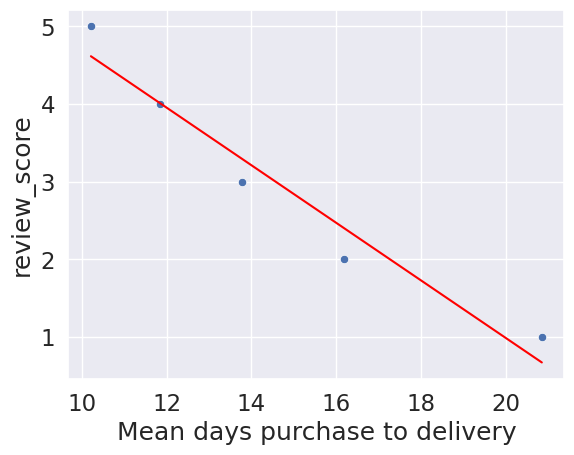

In [ ]:
sns.scatterplot(data=df_review_stats, x='mean', y='review_score')
plt.xlabel("Mean days purchase to delivery")

sns.lineplot(data=df_review_stats, x='mean', y=review_score_predicted, color='red')

In [ ]:
import statsmodels.api as sm

In [ ]:
X = df_review_stats['mean'].values.reshape(-1, 1)
y = df_review_stats['review_score']

In [ ]:
X_with_constant = sm.add_constant(X)

In [ ]:
reg_sm = sm.OLS(y, X_with_constant).fit()

In [ ]:
print(reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     56.45
Date:                Mon, 08 Jul 2024   Prob (F-statistic):            0.00489
Time:                        14:08:09   Log-Likelihood:                -1.3613
No. Observations:                   5   AIC:                             6.723
Df Residuals:                       3   BIC:                             5.941
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4034      0.742     11.322      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


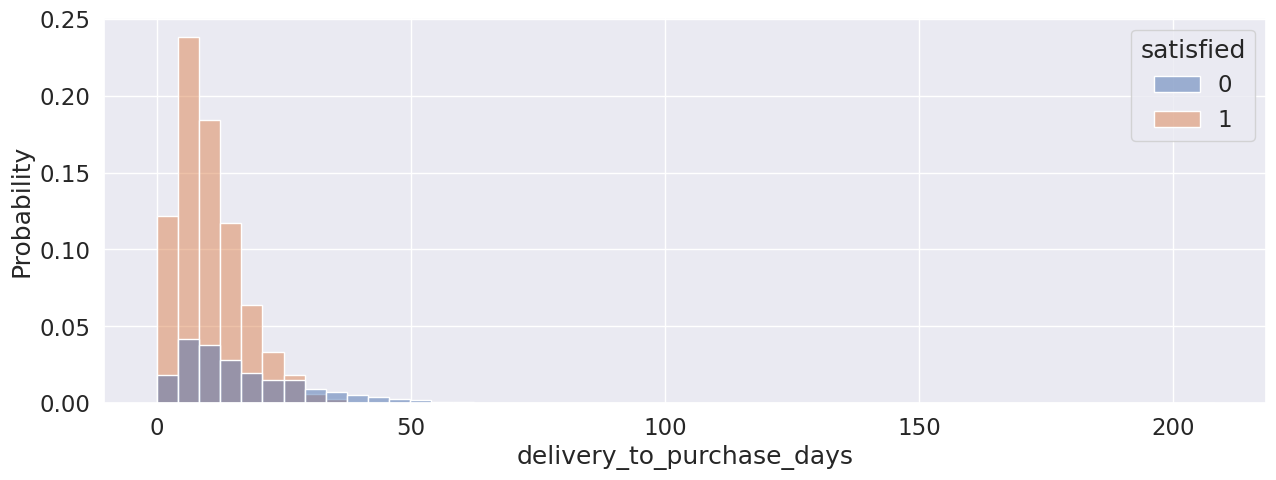

In [ ]:
# creating chart showing satisfied (>= 4 review score) vs not satisfied (< 4 review score)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

ax=sns.histplot(data=df_order_stats,
             x='delivery_to_purchase_days',
             hue='satisfied',
             bins=50,
             stat='probability')

## 5.2 Review Score vs Delayed Delivery Days


In [ ]:
# testing review score vs delayed delivery days
df_review_stats2 = df_order_stats.groupby('review_score')['delayed_delivery_days']\
                      .agg(['mean', 'median', 'min', 'max','count'])\
                      .reset_index()

Text(0.5, 0, 'Median delayed delivery days')

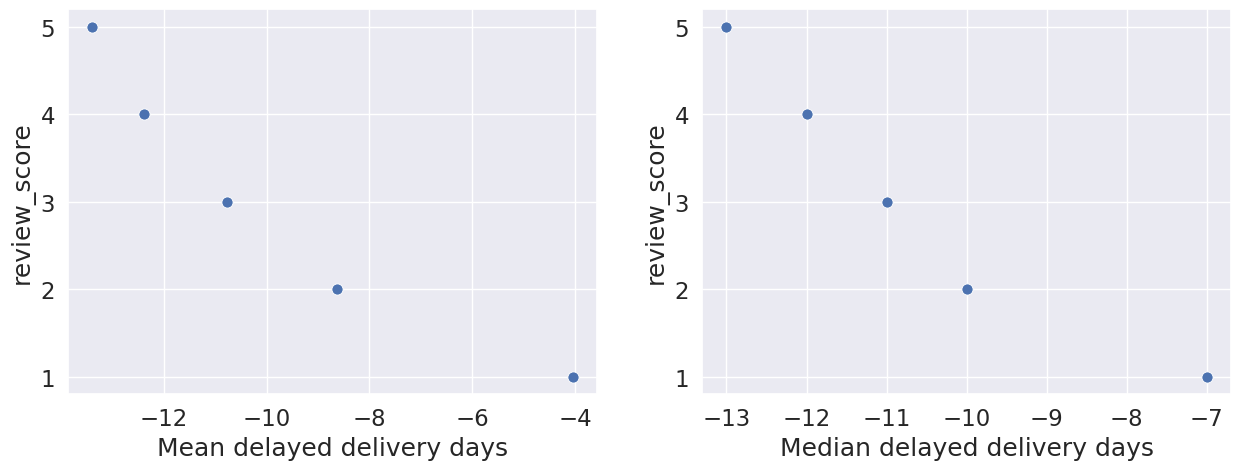

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


sns.scatterplot(data=df_review_stats2, x='mean', y='review_score',
                ax=axes[0], s=65)
axes[0].set_xlabel("Mean delayed delivery days")

sns.scatterplot(data=df_review_stats2, x='median', y='review_score',
                ax=axes[1], s=65)
axes[1].set_xlabel("Median delayed delivery days")

In [ ]:
df_review_stats2

,review_score,mean,median,min,max,count
0,1.0,-4.048108,-7.0,-69.0,175.0,9354
1,2.0,-8.630264,-10.0,-56.0,188.0,2921
2,3.0,-10.760515,-11.0,-135.0,162.0,7917
3,4.0,-12.385642,-12.0,-75.0,161.0,18888
4,5.0,-13.384465,-13.0,-147.0,155.0,56749


In [ ]:
from sklearn.linear_model import LinearRegression

# creating independent variable 'x' and dependent variable 'y'
X = df_review_stats2['mean'].values.reshape(-1, 1)
y = df_review_stats2['review_score']

reg = LinearRegression().fit(X, y)

In [ ]:
print(f"Intercept of linear regression: {reg.intercept_}")
print(f"Coefficients of linear regression: {reg.coef_}")

Intercept of linear regression: -1.0206089183757863
Coefficients of linear regression: [-0.40852379]


**Review_Score = -1.02−0.41× Mean_Delayed_delivery_days**

In [ ]:
review_score_predicted = reg.predict(X)

<Axes: xlabel='Mean delayed delivery days', ylabel='review_score'>

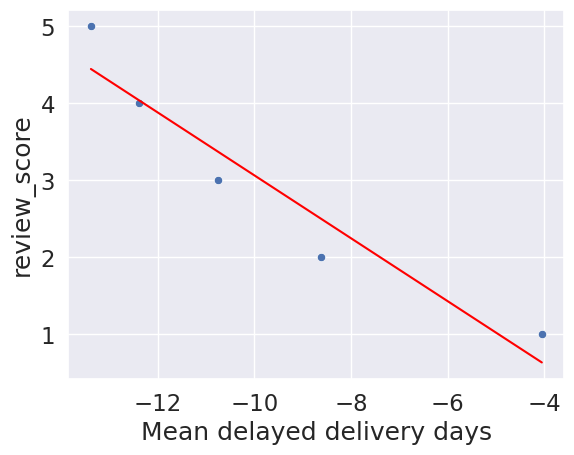

In [ ]:
sns.scatterplot(data=df_review_stats2, x='mean', y='review_score')
plt.xlabel("Mean delayed delivery days")

sns.lineplot(data=df_review_stats2, x='mean', y=review_score_predicted, color='red')

In [ ]:
X = df_review_stats2['mean'].values.reshape(-1, 1)
y = df_review_stats2['review_score']

In [ ]:
X_with_constant = sm.add_constant(X)

In [ ]:
reg_sm = sm.OLS(y, X_with_constant).fit()

In [ ]:
print(reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     32.82
Date:                Mon, 08 Jul 2024   Prob (F-statistic):             0.0106
Time:                        14:09:32   Log-Likelihood:                -2.6280
No. Observations:                   5   AIC:                             9.256
Df Residuals:                       3   BIC:                             8.475
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0206      0.741     -1.378      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


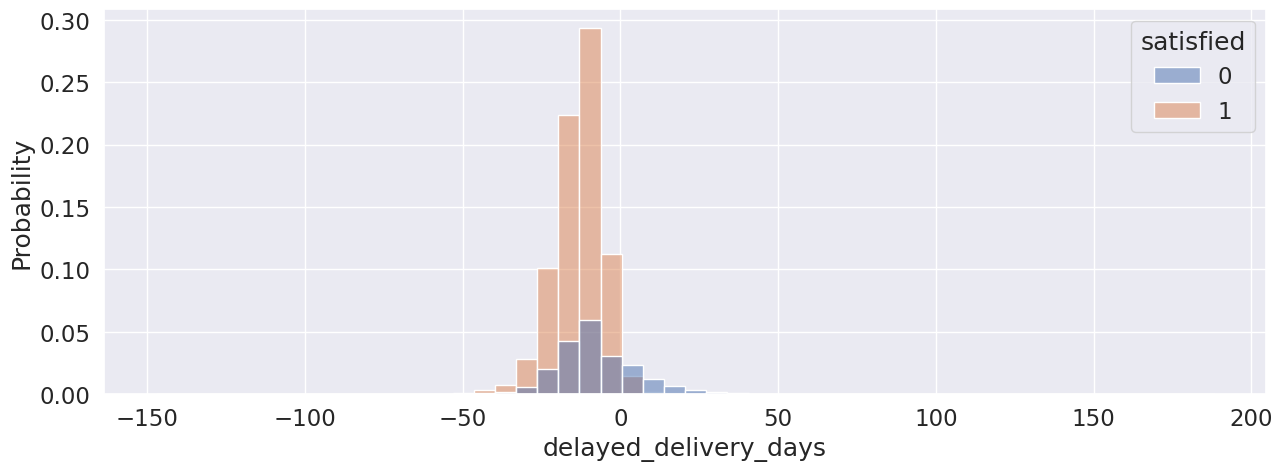

In [ ]:
# creating chart showing satisfied (>= 4 review score) vs not satisfied (< 4 review score)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

ax=sns.histplot(data=df_order_stats,
             x='delayed_delivery_days',
             hue='satisfied',
             bins=50,
             stat='probability')

## 5.3 Review Score vs Seller Delay Days

In [ ]:
# testing review score vs seller delay days

df_review_stats3 = df_order_stats.groupby('review_score')['seller_delay_days']\
                      .agg(['mean', 'median', 'min', 'max','count'])\
                      .reset_index()

Text(0.5, 0, 'Median delayed delivery days')

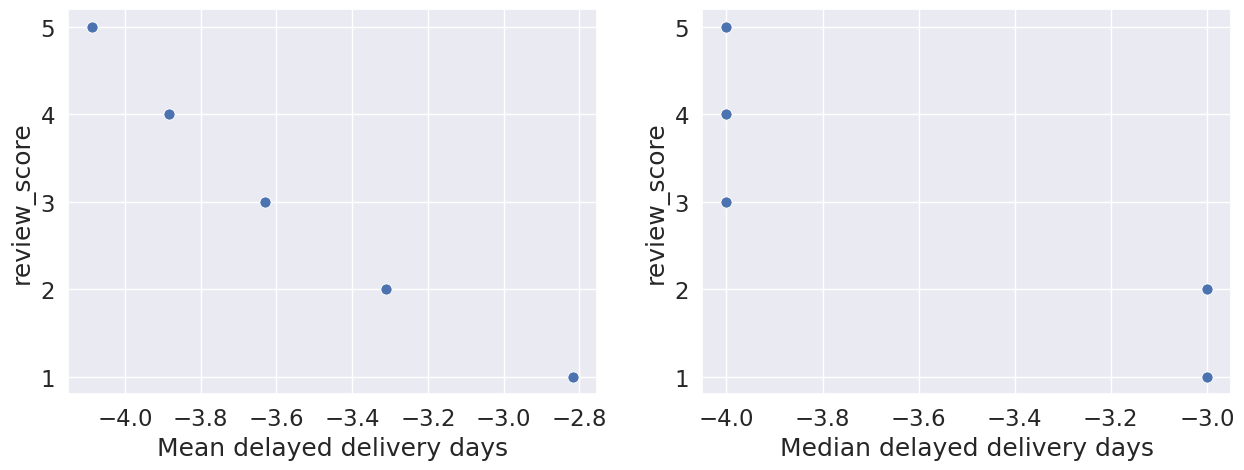

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


sns.scatterplot(data=df_review_stats3, x='mean', y='review_score',
                ax=axes[0], s=65)
axes[0].set_xlabel("Mean seller delay days")

sns.scatterplot(data=df_review_stats3, x='median', y='review_score',
                ax=axes[1], s=65)
axes[1].set_xlabel("Median seller delay days")

In [ ]:
df_review_stats3

,review_score,mean,median,min,max,count
0,1.0,-2.817093,-3.0,-1055.0,95.0,10036
1,2.0,-3.309452,-3.0,-34.0,35.0,3004
2,3.0,-3.630473,-4.0,-49.0,40.0,8030
3,4.0,-3.882994,-4.0,-58.0,116.0,18976
4,5.0,-4.086049,-4.0,-1047.0,51.0,56879


In [ ]:
# creating independent variable 'x' and dependent variable 'y'
X = df_review_stats3['mean'].values.reshape(-1, 1)
y = df_review_stats3['review_score']

reg = LinearRegression().fit(X, y)

In [ ]:
print(f"Intercept of linear regression: {reg.intercept_}")
print(f"Coefficients of linear regression: {reg.coef_}")

Intercept of linear regression: -8.03506129704045
Coefficients of linear regression: [-3.11266574]


**Review_Score = -8.03−3.11× Mean_seller_delay_days**

In [ ]:
review_score_predicted = reg.predict(X)

<Axes: xlabel='Mean delayed delivery days', ylabel='review_score'>

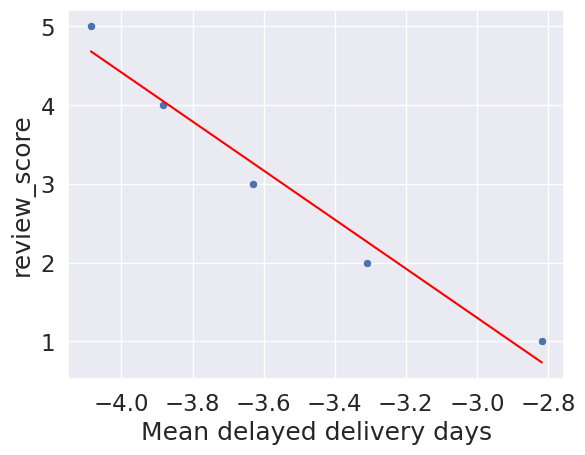

In [ ]:
sns.scatterplot(data=df_review_stats3, x='mean', y='review_score')
plt.xlabel("Mean delayed seller days")

sns.lineplot(data=df_review_stats3, x='mean', y=review_score_predicted, color='red')

In [ ]:
X = df_review_stats3['mean'].values.reshape(-1, 1)
y = df_review_stats3['review_score']

In [ ]:
X_with_constant = sm.add_constant(X)

In [ ]:
reg_sm = sm.OLS(y, X_with_constant).fit()

In [ ]:
print(reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     92.21
Date:                Mon, 08 Jul 2024   Prob (F-statistic):            0.00240
Time:                        14:17:17   Log-Likelihood:               -0.18382
No. Observations:                   5   AIC:                             4.368
Df Residuals:                       3   BIC:                             3.587
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0351      1.158     -6.937      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


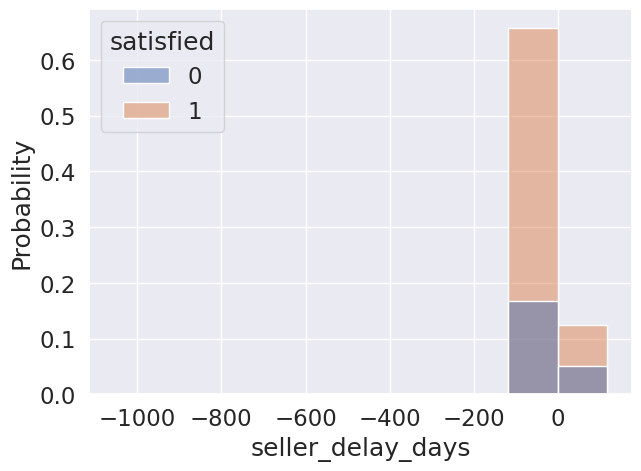

In [ ]:
# creating chart showing satisfied (>= 4 review score) vs not satisfied (< 4 review score)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

ax=sns.histplot(data=df_order_stats,
             x='seller_delay_days',
             hue='satisfied',
             bins=10,
             stat='probability')

## 5.3 Multiple Regression - strong multicolinearity hence we will not use that

In [ ]:
from scipy import stats

independent_variables = ['delivery_to_purchase_days',
                         'delayed_delivery_days',
                         'seller_delay_days']

df_review_stats_mul = df_order_stats.groupby('review_score')[independent_variables]\
                      .agg(mean_delivery_to_purchase_days=('delivery_to_purchase_days', 'mean'),
                           mean_delayed_delivery_days=('delayed_delivery_days', 'mean'),
                           mean_seller_delay_days=('seller_delay_days', 'mean')

                           )\
                      .reset_index()


In [ ]:
df_review_stats_mul

,review_score,mean_delivery_to_purchase_days,mean_delayed_delivery_days,mean_seller_delay_days
0,1.0,20.855997,-4.048108,-2.817093
1,2.0,16.177679,-8.630264,-3.309452
2,3.0,13.791967,-10.760515,-3.630473
3,4.0,11.841645,-12.385642,-3.882994
4,5.0,10.216286,-13.384465,-4.086049


Text(0.5, 0, 'Mean seller delay days')

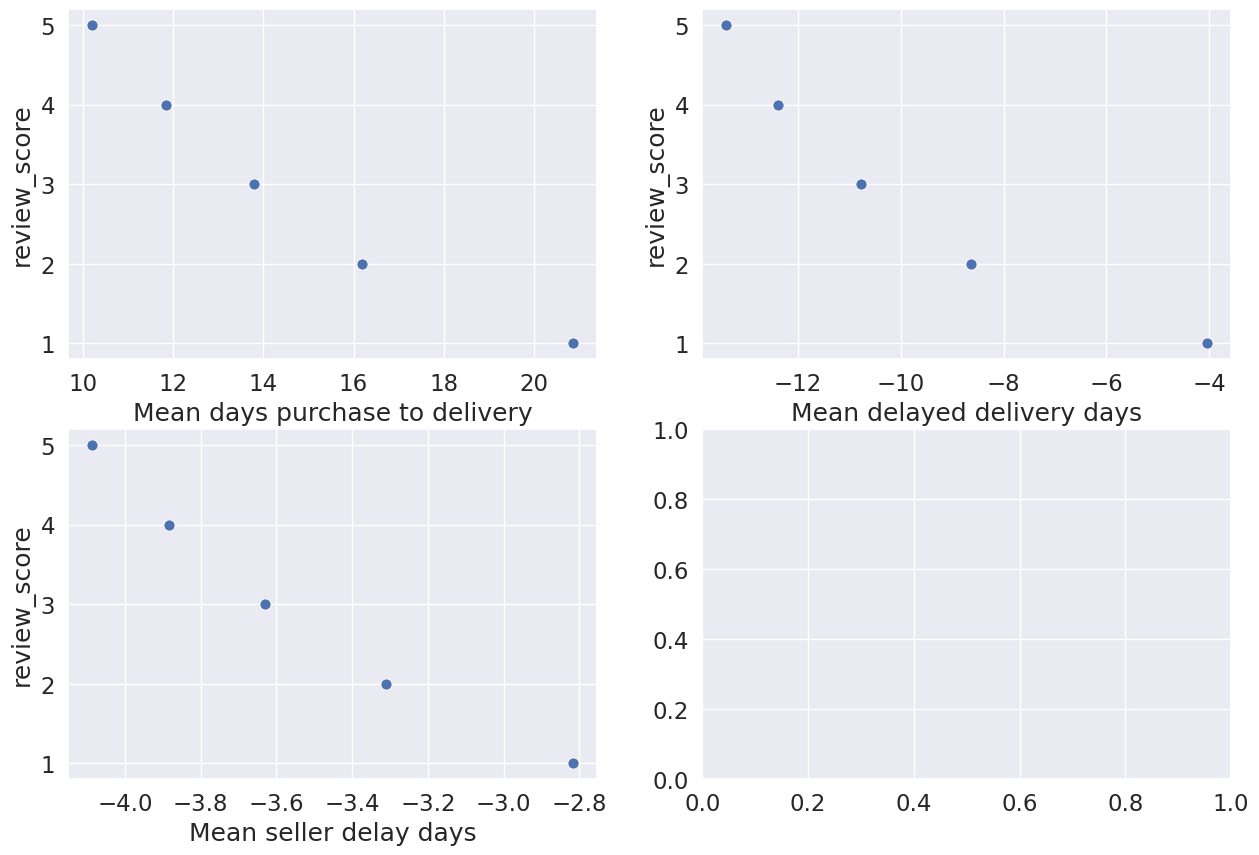

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))


sns.scatterplot(data=df_review_stats_mul,
                x='mean_delivery_to_purchase_days',
                y='review_score',
                ax=axes[0][0], s=65)

axes[0][0].set_xlabel("Mean days purchase to delivery")

sns.scatterplot(data=df_review_stats_mul,
                x='mean_delayed_delivery_days',
                y='review_score',
                ax=axes[0][1], s=65)

axes[0][1].set_xlabel("Mean delayed delivery days")


sns.scatterplot(data=df_review_stats_mul,
                x='mean_seller_delay_days',
                y='review_score',
                ax=axes[1][0], s=65)

axes[1][0].set_xlabel("Mean seller delay days")



In [ ]:
reg_sm = smf.ols(formula=("review_score ~ mean_delivery_to_purchase_days + "
                          "               mean_delayed_delivery_days + "
                          "               mean_seller_delay_days "
),
                 data=df_review_stats_mul).fit()

In [ ]:
print(reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     908.2
Date:                Mon, 08 Jul 2024   Prob (F-statistic):             0.0244
Time:                        14:42:53   Log-Likelihood:                 10.949
No. Observations:                   5   AIC:                            -13.90
Df Residuals:                       1   BIC:                            -15.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# 6. Random Forest

In [102]:
df_merged_copy=df_merged

In [103]:
#adding_metrics

df_merged_copy['delivery_to_purchase_days'] = (df_merged_copy['order_delivered_customer_date'] - df_merged_copy['order_purchase_timestamp']).dt.days
df_merged_copy['delayed_delivery_days'] = (df_merged_copy['order_delivered_customer_date'] - df_merged_copy['order_estimated_delivery_date']).dt.days
df_merged_copy['seller_delay_days'] = (df_merged_copy['order_delivered_carrier_date'] - df_merged_copy['shipping_limit_date']).dt.days
df_merged_copy['freight_to_price'] = df_merged_copy['freight_value'] / df_merged_copy['price']

In [104]:
selected_features_temporal = ["delivery_to_purchase_days", "delayed_delivery_days", "seller_delay_days"]

selected_features_numeric = [
        "price", "freight_value",
        "product_photos_qty",
        "product_weight_g",
        "freight_to_price"]

selected_features_categorical = ["customer_city", "seller_state",
                                    "product_category_name_english", "purchase_month"]


target = ["review_score"]

df_merged_copy[["order_id", "customer_id", "order_item_id", "product_id"] + selected_features_numeric + selected_features_categorical + selected_features_temporal]

,order_id,customer_id,order_item_id,product_id,price,freight_value,product_photos_qty,product_weight_g,freight_to_price,customer_city,seller_state,product_category_name_english,purchase_month,delivery_to_purchase_days,delayed_delivery_days,seller_delay_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,1.0,87285b34884572647811a353c7ac498a,29.99,8.72,4.0,500.0,0.290764,sao paulo,SP,housewares,October-2017,8.0,-8.0,-2.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,1.0,87285b34884572647811a353c7ac498a,29.99,8.72,4.0,500.0,0.290764,sao paulo,SP,housewares,October-2017,8.0,-8.0,-2.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,1.0,87285b34884572647811a353c7ac498a,29.99,8.72,4.0,500.0,0.290764,sao paulo,SP,housewares,October-2017,8.0,-8.0,-2.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,1.0,400.0,0.191744,barreiras,SP,perfumery,July-2018,13.0,-6.0,-4.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22,1.0,420.0,0.120200,vianopolis,SP,auto,August-2018,9.0,-18.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116618,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,4.0,4950.0,0.114923,praia grande,SP,baby,February-2018,22.0,-2.0,-5.0
116619,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,1.0,b80910977a37536adeddd63663f916ad,205.99,65.02,2.0,13300.0,0.315646,nova vicosa,SP,home_appliances_2,August-2017,24.0,-6.0,-8.0
116620,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,1.0,6550.0,0.225513,japuiba,MG,computers_accessories,January-2018,17.0,-21.0,-1.0
116621,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,1.0,6550.0,0.225513,japuiba,MG,computers_accessories,January-2018,17.0,-21.0,-1.0


In [105]:
def order_id_stats_new(x: pd.Series):
    """
    This function compute the total delivery time per order.
    We compute the time in days and in seconds for higher resolution
    """
    multiple_items = False
    if x['order_item_id'].nunique() > 1:
        # order has multiple items
        multiple_items = True

    multiple_payments = False
    if x['payment_sequential'].nunique() > 1:
        multiple_payments = True

    res = {}

    for feat in selected_features_temporal:
        aggregated_value = x[feat].mean()
        res[f"{feat}"] = [aggregated_value]

    for feat in selected_features_numeric:
        aggregated_value = x[feat].sum() if multiple_items is True else x[feat].mean()
        res[f"total_{feat}"] = [aggregated_value]

    for feat in selected_features_categorical:
        if feat == "payment_type":
            aggregated_value = "mixed" if multiple_payments is True else x[feat].iloc[0]
        else:
            aggregated_value = x[feat].iloc[0]
        res[feat] = [aggregated_value]

    res['review_score'] = [x['review_score'].mean()]

    return pd.DataFrame(res)


In [106]:
df_order_stats_new = df_merged_copy.groupby(['order_id']).apply(order_id_stats_new)

In [107]:
df_order_stats_new

,,delivery_to_purchase_days,delayed_delivery_days,seller_delay_days,total_price,total_freight_value,total_product_photos_qty,total_product_weight_g,total_freight_to_price,customer_city,seller_state,product_category_name_english,purchase_month,review_score
order_id,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,7.0,-9.0,0.0,58.90,13.29,4.0,650.0,0.225637,campos dos goytacazes,SP,cool_stuff,September-2017,5.0
00018f77f2f0320c557190d7a144bdd3,0,16.0,-3.0,1.0,239.90,19.93,2.0,30000.0,0.083076,santa fe do sul,SP,pet_shop,April-2017,4.0
000229ec398224ef6ca0657da4fc703e,0,7.0,-14.0,-3.0,199.00,17.87,2.0,3050.0,0.089799,para de minas,MG,furniture_decor,January-2018,5.0
00024acbcdf0a6daa1e931b038114c75,0,6.0,-6.0,-5.0,12.99,12.79,1.0,200.0,0.984604,atibaia,SP,perfumery,August-2018,4.0
00042b26cf59d7ce69dfabb4e55b4fd9,0,25.0,-16.0,2.0,199.90,18.14,1.0,3750.0,0.090745,varzea paulista,PR,garden_tools,February-2017,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,17.0,-8.0,-7.0,299.99,43.41,3.0,10150.0,0.144705,sao luis,SC,housewares,April-2018,5.0
fffcd46ef2263f404302a634eb57f7eb,0,9.0,-9.0,-3.0,350.00,36.53,1.0,8950.0,0.104371,curitiba,SP,computers_accessories,July-2018,5.0
fffce4705a9662cd70adb13d4a31832d,0,4.0,-13.0,-5.0,99.90,16.95,1.0,967.0,0.169670,sao paulo,PR,sports_leisure,October-2017,5.0


In [140]:
df_order_stats_new.index = df_order_stats_new.index.droplevel(1)
df_order_stats_new = df_order_stats_new.reset_index()

IndexError: Too many levels: Index has only 1 level, not 2

In [142]:
df_order_stats_new.to_csv("/content/gdrive/MyDrive/Colab Notebooks/Telerik/olist_order_stats_new.csv", sep=';', index=False)

In [143]:
df_order_stats_new = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Telerik/olist_order_stats_new.csv", sep=';')

In [151]:
df_order_stats_new

,order_id,delivery_to_purchase_days,delayed_delivery_days,seller_delay_days,total_price,total_freight_value,total_product_photos_qty,total_product_weight_g,total_freight_to_price,customer_city,seller_state,product_category_name_english,purchase_month,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,7.0,-9.0,0.0,58.90,13.29,4.0,650.0,0.225637,campos dos goytacazes,SP,cool_stuff,September-2017,5.0
1,00018f77f2f0320c557190d7a144bdd3,16.0,-3.0,1.0,239.90,19.93,2.0,30000.0,0.083076,santa fe do sul,SP,pet_shop,April-2017,4.0
2,000229ec398224ef6ca0657da4fc703e,7.0,-14.0,-3.0,199.00,17.87,2.0,3050.0,0.089799,para de minas,MG,furniture_decor,January-2018,5.0
3,00024acbcdf0a6daa1e931b038114c75,6.0,-6.0,-5.0,12.99,12.79,1.0,200.0,0.984604,atibaia,SP,perfumery,August-2018,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,25.0,-16.0,2.0,199.90,18.14,1.0,3750.0,0.090745,varzea paulista,PR,garden_tools,February-2017,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95823,fffc94f6ce00a00581880bf54a75a037,17.0,-8.0,-7.0,299.99,43.41,3.0,10150.0,0.144705,sao luis,SC,housewares,April-2018,5.0
95824,fffcd46ef2263f404302a634eb57f7eb,9.0,-9.0,-3.0,350.00,36.53,1.0,8950.0,0.104371,curitiba,SP,computers_accessories,July-2018,5.0
95825,fffce4705a9662cd70adb13d4a31832d,4.0,-13.0,-5.0,99.90,16.95,1.0,967.0,0.169670,sao paulo,PR,sports_leisure,October-2017,5.0
95826,fffe18544ffabc95dfada21779c9644f,1.0,-9.0,-6.0,55.99,8.72,1.0,100.0,0.155742,vinhedo,SP,computers_accessories,August-2017,5.0


In [152]:
df_order_stats_new = df_order_stats_new[~df_order_stats_new['delayed_delivery_days'].isna()]
df_order_stats_new = df_order_stats_new[~df_order_stats_new['delivery_to_purchase_days'].isna()]
df_order_stats_new = df_order_stats_new[~df_order_stats_new['seller_delay_days'].isna()]
df_order_stats_new = df_order_stats_new[~df_order_stats_new['review_score'].isna()]

In [153]:
X_categorical = ["customer_city", "seller_state", "product_category_name_english", "purchase_month"]

In [163]:
X_categorical

['customer_city',
 'seller_state',
 'product_category_name_english',
 'purchase_month']

In [3]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1


In [4]:
!pip install -U scikit-learn

  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)


In [5]:
!pip install -U catboost

In [164]:
from sklearn.preprocessing import TargetEncoder

In [165]:
enc_auto = TargetEncoder(smooth="auto")

X_categorical_transformed = enc_auto.fit_transform(df_order_stats_new[X_categorical], # X
                                                   df_order_stats_new['review_score'] # y
                                                   )


In [160]:
X_categorical_transformed.shape


(95828, 20)

In [148]:
enc_auto = TargetEncoder(smooth="auto")

X_categorical_transformed = enc_auto.fit_transform(df_order_stats_new[X_categorical], # X
                                                   df_order_stats_new['review_score'] # y
                                                   )


In [166]:
X_categorical_transformed

array([[0.14012209, 0.01689673, 0.07308158, ..., 0.07590549, 0.2021069 ,
        0.61926915],
       [0.08056991, 0.0395299 , 0.08009758, ..., 0.08880161, 0.21258537,
        0.5721315 ],
       [0.13183654, 0.        , 0.13088082, ..., 0.09285894, 0.19162737,
        0.57667126],
       ...,
       [0.08104375, 0.02765694, 0.07911527, ..., 0.0855457 , 0.20966923,
        0.59099838],
       [0.06286127, 0.01574485, 0.12406516, ..., 0.07005157, 0.19746366,
        0.64008282],
       [0.09996985, 0.02505596, 0.06269258, ..., 0.0641003 , 0.19043827,
        0.64570266]])